# Spam dataset with ensemble methods

In [8]:
!pip install six

In [9]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/decision_trees

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 378 (delta 74), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (378/378), 42.71 MiB | 13.48 MiB/s, done.
Resolving deltas: 100% (197/197), done.
/content/machine_learning_1/decision_trees


In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import utils

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

np.random.seed(0)

# The spam email dataset

In [11]:
emails = np.array([
    [7,8,1],
    [3,2,0],
    [8,4,1],
    [2,6,0],
    [6,5,1],
    [9,6,1],
    [8,5,0],
    [7,1,0],
    [1,9,1],
    [4,7,0],
    [1,3,0],
    [3,10,1],
    [2,2,1],
    [9,3,0],
    [5,3,0],
    [10,1,0],
    [5,9,1],
    [10,8,1],
])
spam_dataset = pd.DataFrame(data=emails, columns=["Lottery", "Sale", "Spam"])
spam_dataset

,Lottery,Sale,Spam
0,7,8,1
1,3,2,0
2,8,4,1
3,2,6,0
4,6,5,1
5,9,6,1
6,8,5,0
7,7,1,0
8,1,9,1
9,4,7,0


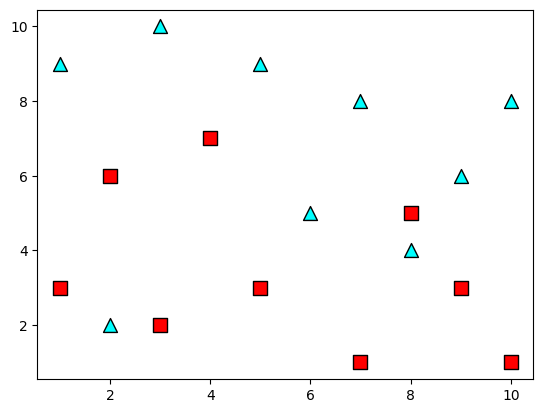

In [12]:
features = spam_dataset[['Lottery', 'Sale']]
labels = spam_dataset['Spam']
utils.plot_points(features, labels)

In [6]:
decision_tree_classifier = DecisionTreeClassifier(random_state=0)
decision_tree_classifier.fit(features, labels)
decision_tree_classifier.score(features, labels) # overfitting

1.0

# Training a decision tree

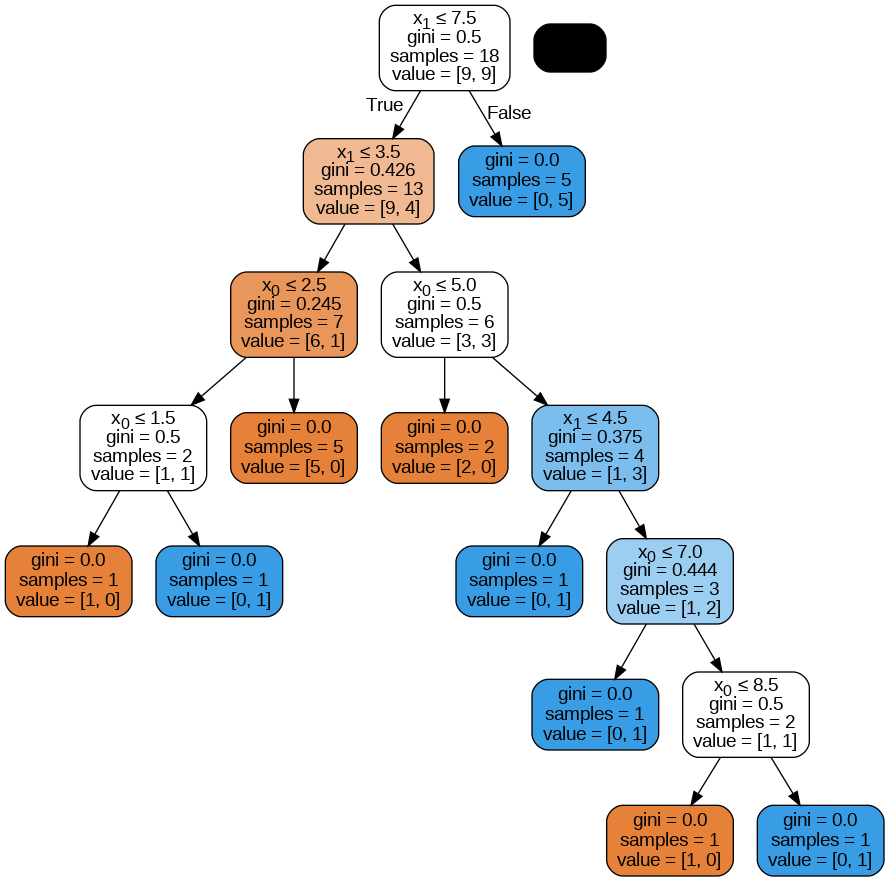

In [7]:
utils.display_tree(decision_tree_classifier)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


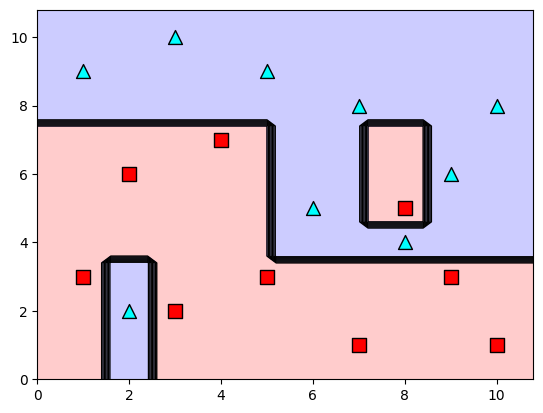

In [8]:
utils.plot_model(features, labels, decision_tree_classifier)

# Training a random forest by hand

In [10]:
First_Batch = spam_dataset.iloc[0:6]
Feature1 = First_Batch[['Lottery' , 'Sale']]
Feature1

,Lottery,Sale
0,7,8
1,3,2
2,8,4
3,2,6
4,6,5
5,9,6


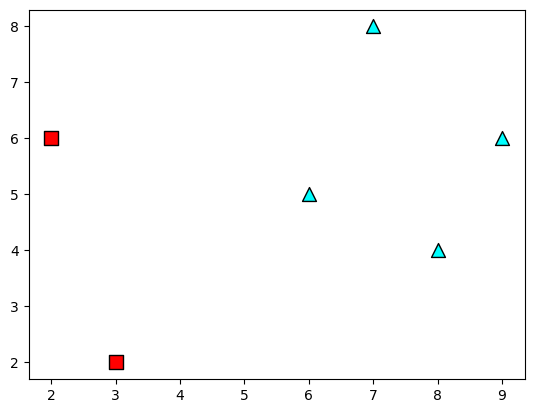

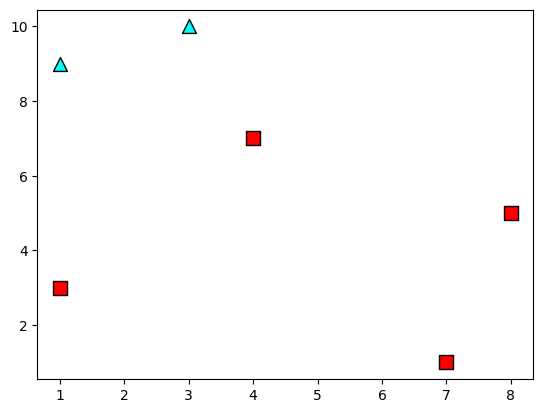

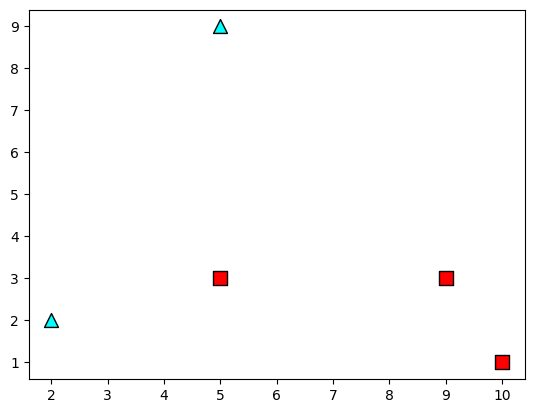

In [12]:
# Select the first batch of data (rows 0-5)
First_Batch = spam_dataset.iloc[0:6]
First_Batch
# Extract the features ('Lottery' and 'Sale') from the first batch
Feature1 = First_Batch[['Lottery' , 'Sale']]

# Extract the labels ('Spam') from the first batch
Label1 = First_Batch['Spam']

# Plot the first batch of data points
utils.plot_points(Feature1, Label1)
plt.show()

# Select the second batch of data (rows 6-11)
Second_Batch = spam_dataset.iloc[6:12]

# Extract the features ('Lottery' and 'Sale') from the second batch
Feature2 = Second_Batch[['Lottery' , 'Sale']]

# Extract the labels ('Spam') from the second batch
Label2 = Second_Batch['Spam']

# Plot the second batch of data points
utils.plot_points(Feature2, Label2)
plt.show()

# Select the third batch of data (rows 12-17)

Third_Batch = spam_dataset.iloc[12:17]
# Extract the features ('Lottery' and 'Sale') from the third batch
Feature3 = Third_Batch[['Lottery' , 'Sale']]

# Extract the labels ('Spam') from the third batch
Label3 = Third_Batch['Spam']

# Plot the third batch of data points
utils.plot_points(Feature3 , Label3)


Weak learner 1 training accuracy: 1.0


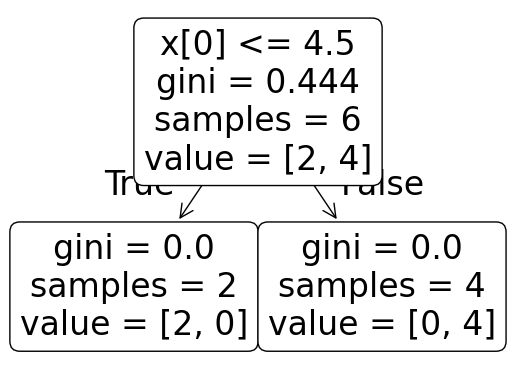

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


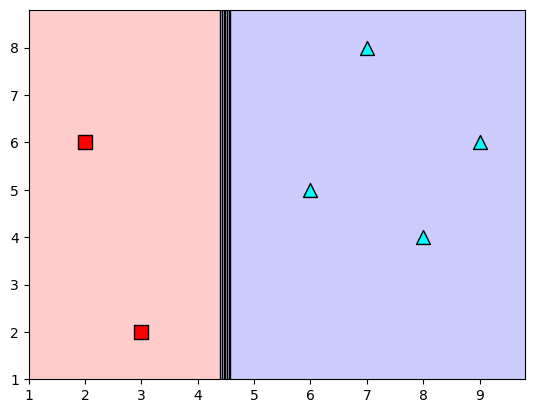

Weak learner 2 training accuracy: 1.0


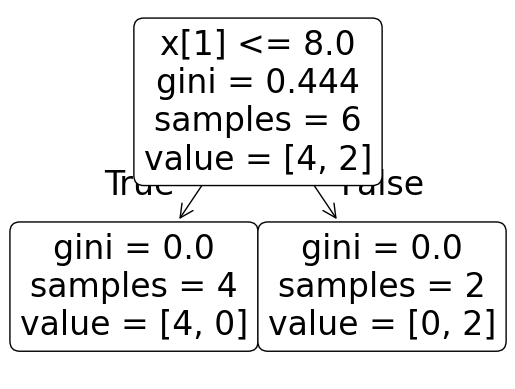

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


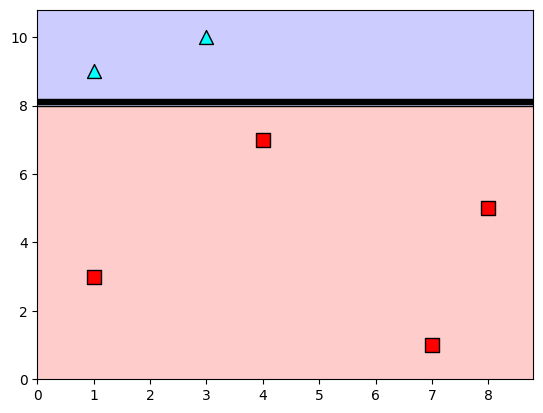

Weak learner 3 training accuracy: 0.8


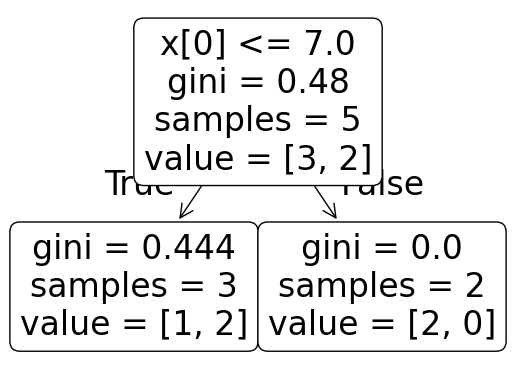

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


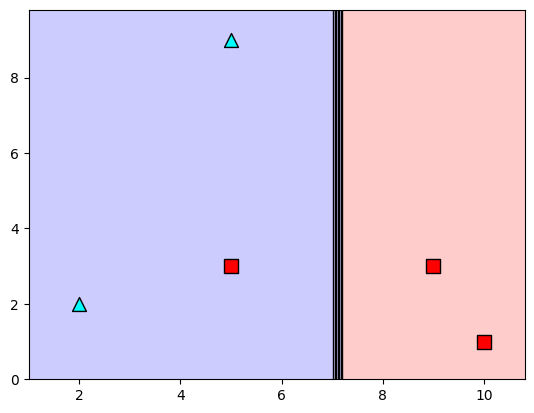

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Train the first weak learner (Decision Tree with max depth 1) on the first batch
dt1 = DecisionTreeClassifier(random_state=0, max_depth=1)
dt1.fit(Feature1 , Label1)

# Print training accuracy for the first weak learner
print("Weak learner 1 training accuracy:", dt1.score(Feature1 , Label1))

# Plot the decision tree for the first weak learner
tree.plot_tree(dt1, rounded=True)
plt.show()

# Visualize the decision boundary for the first weak learner
utils.plot_model(Feature1,Label1 ,  dt1)

# Train the second weak learner (Decision Tree with max depth 1) on the second batch
dt2 = DecisionTreeClassifier(random_state=0, max_depth=1)
dt2.fit(Feature2 , Label2)

# Print training accuracy for the second weak learner
print("Weak learner 2 training accuracy:", dt2.score(Feature2 , Label2))

# Plot the decision tree for the second weak learner
tree.plot_tree(dt2, rounded=True)
plt.show()

# Visualize the decision boundary for the second weak learner
utils.plot_model(Feature2, Label2 ,  dt2)

# Train the third weak learner (Decision Tree with max depth 1) on the third batch
dt3 = DecisionTreeClassifier(random_state=0, max_depth=1)
dt3.fit(Feature3 , Label3)

# Print training accuracy for the third weak learner
print("Weak learner 3 training accuracy:", dt3.score(Feature3 , Label3))

# Plot the decision tree for the third weak learner
tree.plot_tree(dt3, rounded=True)
plt.show()

# Visualize the decision boundary for the third weak learner
utils.plot_model(Feature3 , Label3, dt3)


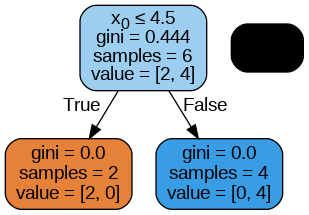

In [14]:
utils.display_tree(dt1)

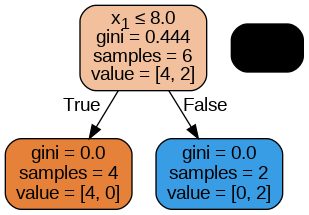

In [15]:
utils.display_tree(dt2)

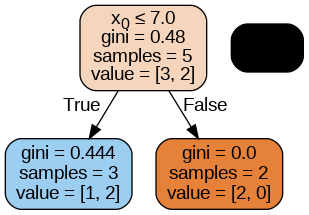

In [16]:
utils.display_tree(dt3)

In [19]:
from scipy.stats import mode

test_features = spam_dataset[['Lottery', 'Sale']]

pred1 = dt1.predict(test_features)
pred2 = dt2.predict(test_features)
pred3 = dt3.predict(test_features)

all_preds = np.vstack((pred1, pred2, pred3)).T
final_predictions = mode(all_preds, axis=1).mode.flatten()
ensemble_accuracy = np.mean(final_predictions == spam_dataset['Spam'])
print(f"Ensemble Bagging Accuracy: {ensemble_accuracy}")

Ensemble Bagging Accuracy: 0.6666666666666666


# Training a random forest using sklearn

In [27]:
from sklearn.ensemble import RandomForestClassifier
## TODO ##
# use random forest to classify the data
# use 5 estimators
# use depth = 1
random_forest_classifier = RandomForestClassifier(random_state=0 , n_estimators=5 , max_depth=1)
random_forest_classifier.fit(features , labels)
random_forest_classifier.score(features , labels)

0.8333333333333334

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


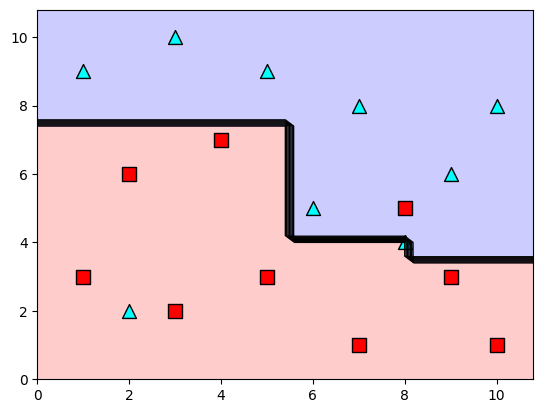

In [21]:
utils.plot_model(features, labels, random_forest_classifier)

****************************** Estimator ******************************


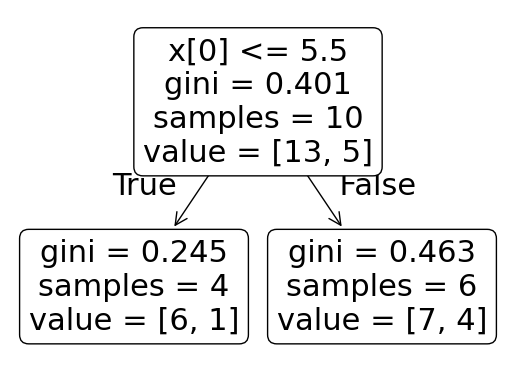

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


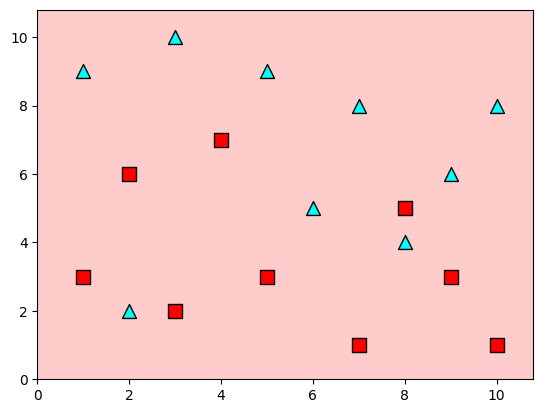

****************************** Estimator ******************************


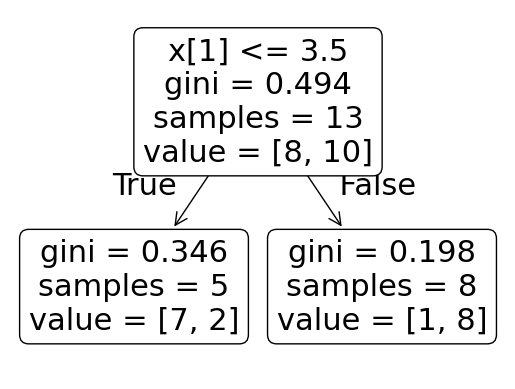

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


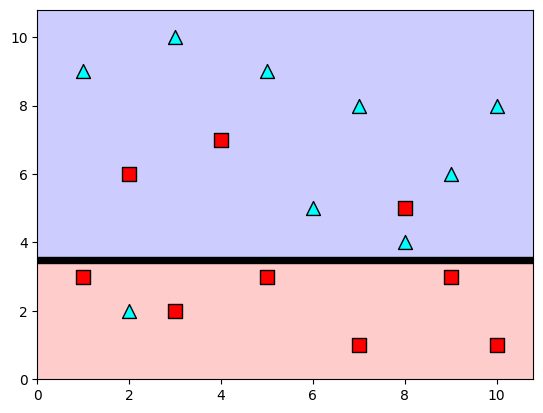

****************************** Estimator ******************************


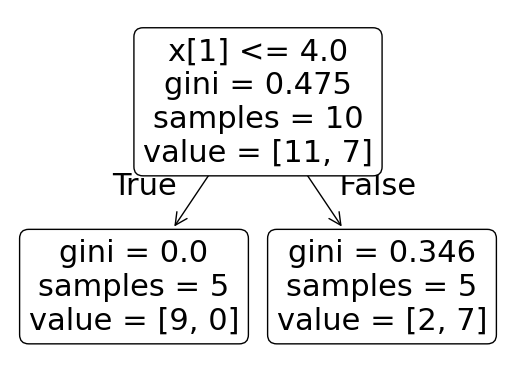

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


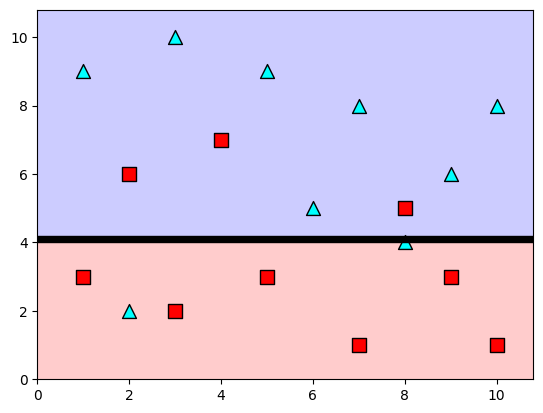

****************************** Estimator ******************************


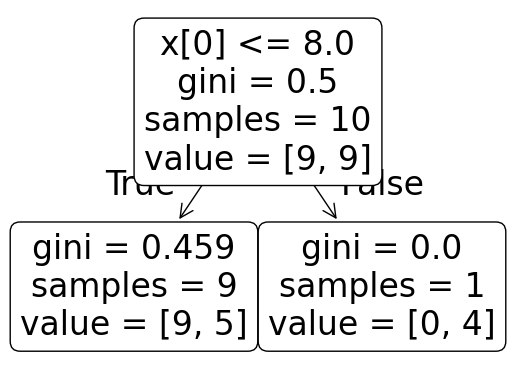

[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


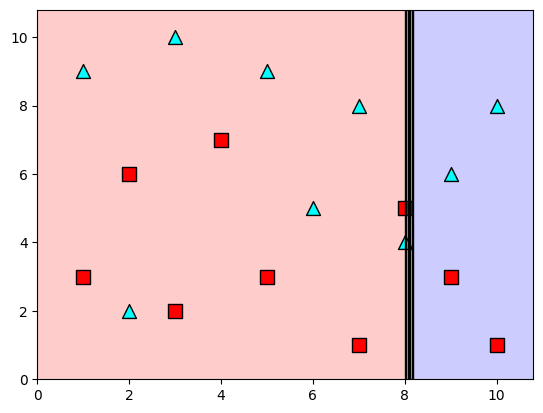

****************************** Estimator ******************************


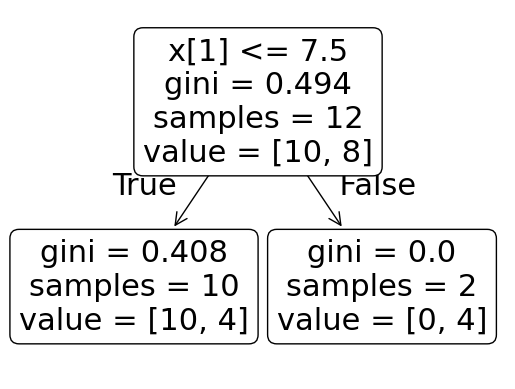

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


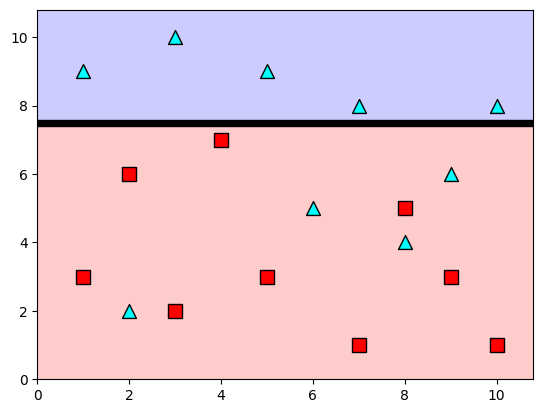

In [22]:
for dt in random_forest_classifier.estimators_:
    print("*"*30, "Estimator", "*"*30)
    tree.plot_tree(dt, rounded=True)
    plt.show()
    utils.plot_model(features, labels, dt)
    plt.show()

AdaBoost


In [41]:
from sklearn.ensemble import AdaBoostClassifier
Ada_Model = AdaBoostClassifier(random_state = 0, n_estimators=10)
Ada_Model.fit(features , labels)
Ada_Model.score(features , labels)

0.8888888888888888

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


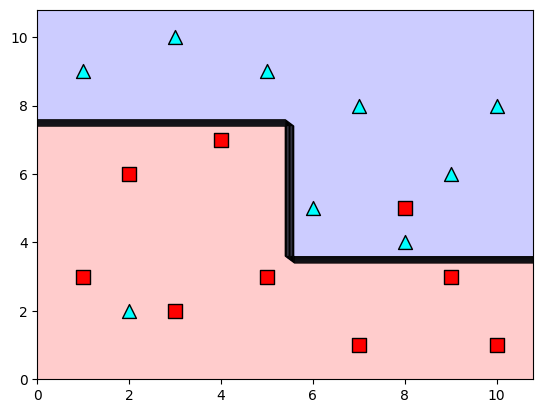

In [31]:
utils.plot_model(features , labels , Ada_Model)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


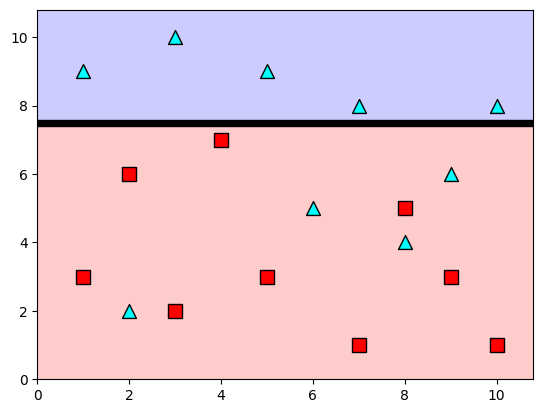

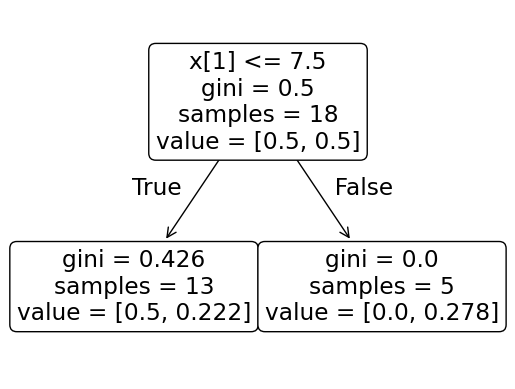

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


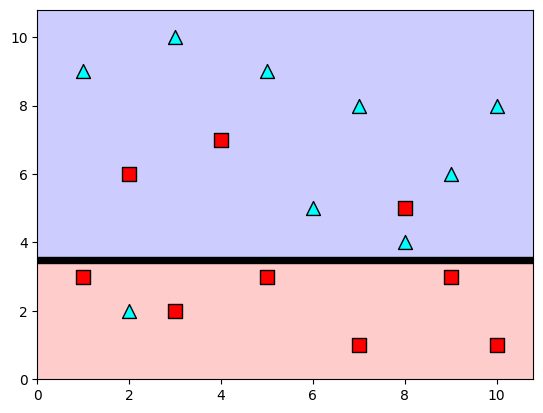

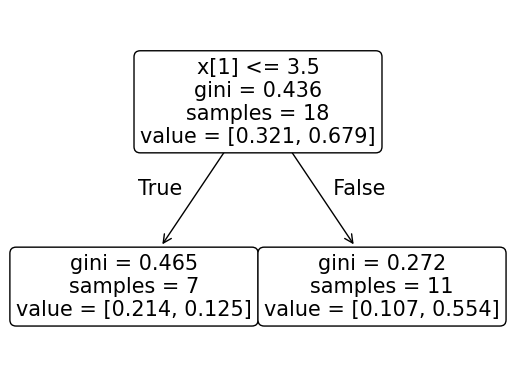

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


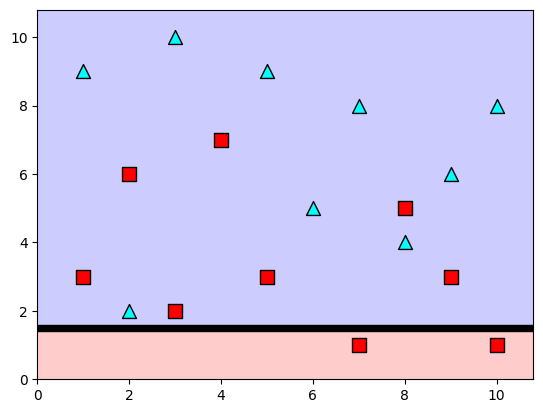

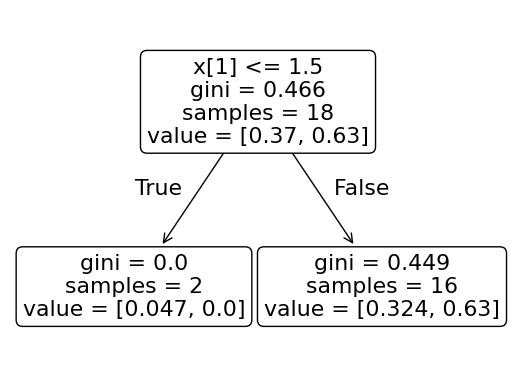

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


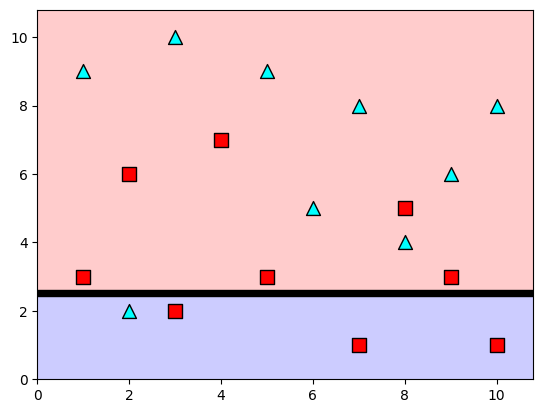

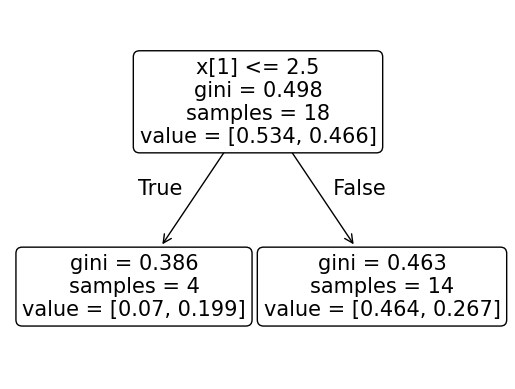

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


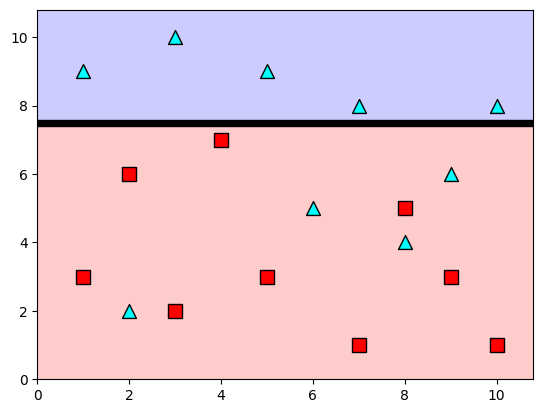

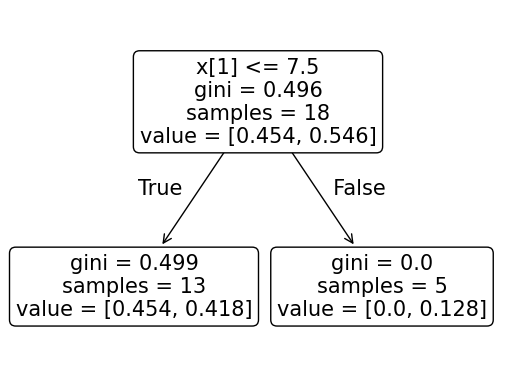

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


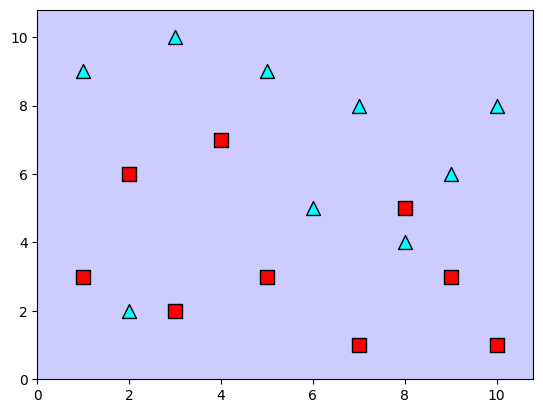

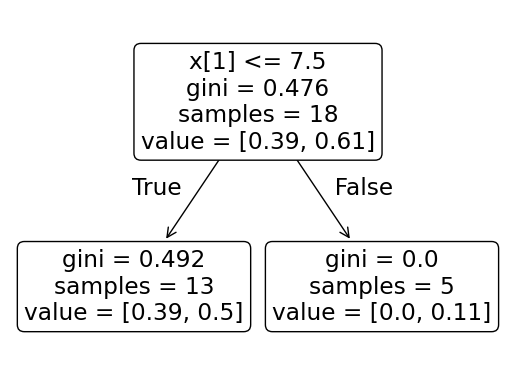

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


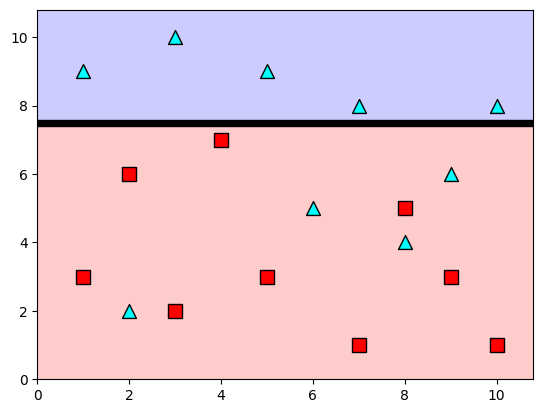

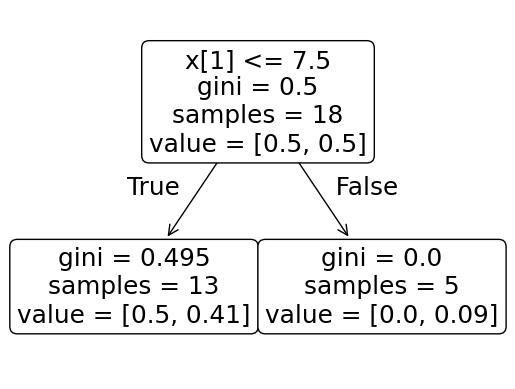

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


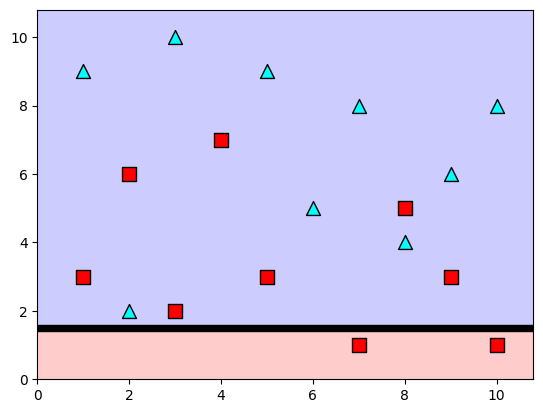

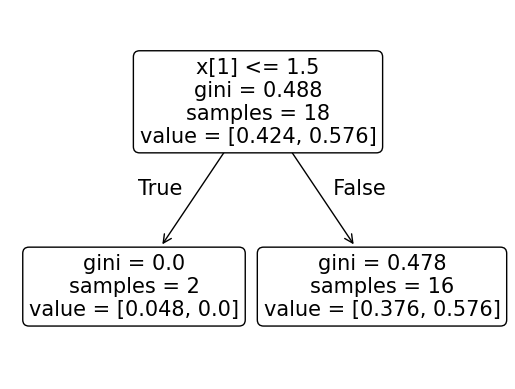

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


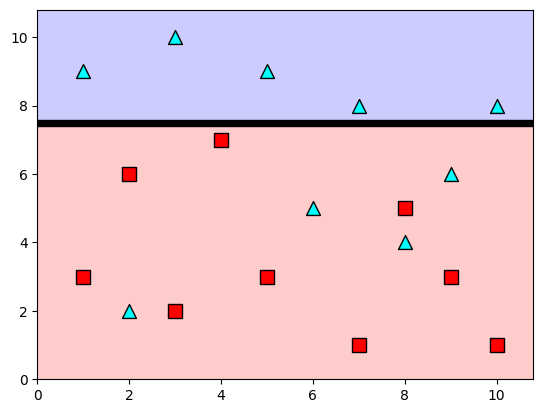

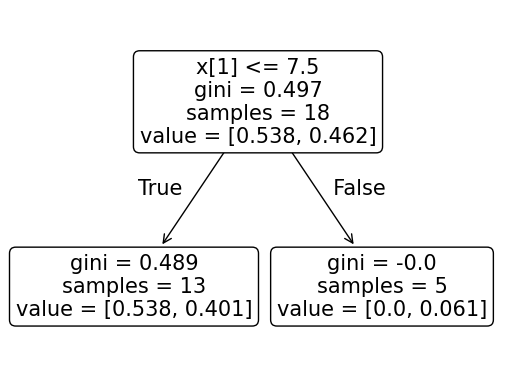

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


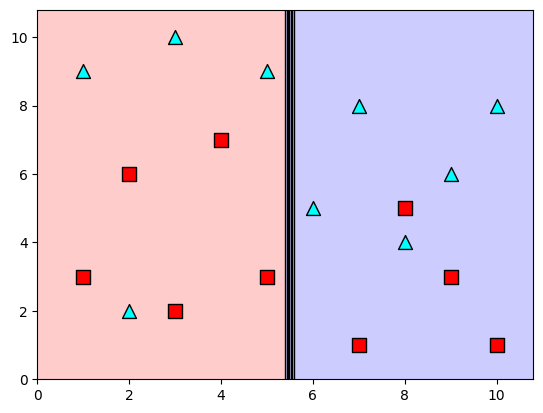

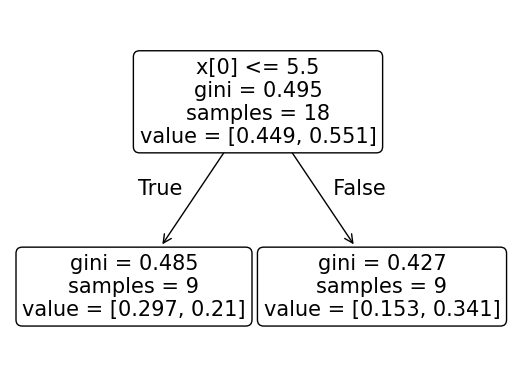

In [36]:
for m in Ada_Model.estimators_:
  utils.plot_model(features , labels , m)
  plt.show()
  tree.plot_tree(m , rounded=True)
  plt.show()